<h1 style="text-align:center"> Computational Geometry </h1>
<h1 style="text-align:center"> Project 2 </h1>
<h2 style="text-align:center"> Spring 2019-20 </h2>

<h3>Participants</h3>

The current projects was written by the following:

<ul>
    <li>Lekkas Nikolaos - 1115201600089</li>
    <li>Lykos Emmanouil - 1115201600096</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

<h3>Exercise 1</h3>

<i>Implement from scratch the k-NN algorithm in python programming language.Present your method and how you worked, conclude by discussing the disadvantages of the k-NN algorithm, if any.</i>


Now for the k-NN algorithm:

1) In the training part, we just save the data which will be used for deciding test data.

2) In the testing/classification part, k-NN computes and sorts the distances from every point of the training data set (in our algorithm with the help of the euclidean distance) and decides the k points closer to our test point.

3) Now that we have the points that are neighbors to our point we need to choose the category with which our point will be classified. To do that we find the most common category found or the average value.

Comments:
The value of k, the number of neighbors, is important for the decision of the classification. For example if the k is very small we may have a fault result because of a leftalone point in the training dataset.
On the other side if the k is very big and we have few data we may find some few close neighbors and the many neighbors that are very far away. 
In this situation unfortunately the algorithm will choose the category based by the neighbors that are far away because they are more than the ones closer to our point.
We need to find a value for k which is going to give us decent classification. 
It plays one of the main roles in the results of the classification and so it is something that should be taken seriously as a parameter in our model.

Advantages:
k-NN is a very simple classifier that works well classifying testing data from training data.

Disadvantages:
The main disadvantage of the KNN is that it does not learn anything from the training data. It simply uses the training data itself for classification. To predict the label/category of a test case k-NN will find the k closest neighbors/points from the training data. The most common label among the k closest neighboring points will be the classification label. The disadvantage in that is that we need to compute the distance and sort all the training data at each prediction, which can be slow if there are a large number of training examples. As we said the algorithm does not learn anything from the training data, which can result in the algorithm not generalizing well. This means that it won't predict well about points/test cases with not enough relative data.  Lastly, for some values of k the algorithm will not be robust to noisy data and may extract wrong infromation from them. Changing k can change the resulting predicted class label and so the decision of k plays a big role in the accuracy of the algorithm.


In [2]:
#   Euclidean distance between two vectors
def euclideanDistance(vector1, vector2):
    distance = 0.0
    length = len(vector1)
    for i in range(length):
        distance += np.square(vector1[i] - vector2[i])
    return np.sqrt(distance)

In [3]:
def mostFrequentItem(itemList): 
#     print (set(itemList))
    return max(set(itemList), key = itemList.count)  ## max according counts of each item in the list 

In [4]:
def findKNearest(testData,trainData,k):
    kNearest=[]
    cnt=0
    for row in trainData:
        cnt+=1
        distance = euclideanDistance(testData, row)
        if cnt<=k:
            newRow=np.append(row,[distance])
#             print (newRow)
            kNearest+=[newRow]
#             print (kNearest)
        else:
            for item in  kNearest: # for each item in knearest list 
#                 print(item)
                if item[-1]>distance: # if the new item has less distance than at least one in the list add it to the knearest list
                    newRow=np.append(row,[distance])
                    kNearest+=[newRow] #add to the set
#                     print (kNearest)
                    kNearest.sort(key=lambda x: x[-1]) # sort using the last column
                    kNearest=kNearest[:k] # select k items from the sorted list
#                   print (kNearest)
                    break
    return kNearest

<h3>Exercise 2</h3>

<i>Using the code provided at the class (or implementing your own) explain what is the curse of dimensionality and how is related to the $k$-NN algorithm.</i>

The <b>Curse of Dimensionality</b> is the phenomenon where when we increase the dimensionality of the data(equally the number of features), the feature space exponentially grows and the data get more far away as we can verify from the results of the code below where we print at each line the dimension, the minimum distance, the mean distance and the minimum-average distance ration of 2 points.

In [5]:
import random

def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [euclideanDistance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]

dimensions = range(1, 150, 5)

avg_distances = []
min_distances = []

random.seed(0)

for dim in dimensions:
    distances = random_distances(dim, 10000)  # 10,000 random pairs
    avg_distances.append(np.mean(distances))     # track the average
    min_distances.append(min(distances))      # track the minimum
    print(dim, min(distances), np.mean(distances), min(distances) / np.mean(distances))

1 7.947421226228712e-06 0.3310009902894397 2.4010264196730013e-05
6 0.18647467260473205 0.9677679968196345 0.1926853060005515
11 0.315888574043911 1.3334395796543037 0.23689755341281052
16 0.7209190490469604 1.6154152410436058 0.4462747600308794
21 0.9694045860570238 1.8574960773724087 0.5218878240800011
26 1.1698067560262715 2.063221470005646 0.5669807013122398
31 1.2930748713962408 2.257299829279515 0.5728414340991487
36 1.5123637311959328 2.43767091331656 0.6204134130387168
41 1.5514668006745476 2.6039686964057926 0.5958085451703037
46 1.6688006850159558 2.7567960531354916 0.6053406392242601
51 2.0135369208019926 2.9029973365343897 0.6936061895274631
56 2.1422705294432887 3.046195309569519 0.7032610557548358
61 2.2891825062886793 3.178371787765626 0.7202374860928272
66 2.3805561409678484 3.3055795715248357 0.7201630121006943
71 2.428355816745725 3.4329484139337705 0.7073674066552909
76 2.5356413086431617 3.5584750622227586 0.7125640237195604
81 2.682272988673655 3.6698733685779983 0

Therefore the feature space becomes more sparse which is detrimental generally to machine learning models because we need our data to be dense because if it is not we have much blank space that we do not know how it is classified. Specifically, to our $k$-NN model Curse of Dimensionality is detrimental because this kind of classifier assumes that two(or more) samples who are close one another belong to the same class, so if the samples are far away it is assumed that these samples may not belong in the same class. Furthermore, if provided a point that lies in the inner part of the space-that will probably be dense or blank-creates a problem because all the training samples will be far away from this point, thus the classifier might not perform well on that point and in all these kind of points because we do not give info about the "neighborhood" in the inner part of the space.

In order to fix this problem we need either more data, either apply feature selection or dimensionality reduction algorithms in order to make the space more dense. But, we should tell that the task to provide more data is not so easy and the extra data might not be sufficient because we might either do not have more data and if we had we should have exponentatially more data because we showed in the class that the necessary number of samples is increased exponentatially with the number of dimensions.

Further Info:<br>
    <a href=https://towardsdatascience.com/k-nearest-neighbors-and-the-curse-of-dimensionality-e39d10a6105d>k-Nearest Neighbors and the Curse of Dimensionality</a>

<h3>Exercise 3</h3>

<i> 1. Suppose there is a set of points on a two-dimensional plane from two different classes.
Points in class Red are (0, 1), (2, 3), (4, 4) and points in class Blue are (2, 0), (5, 2),
(6, 3). Draw the k-nearest-neighbor decision boundary for k = 1 as we discussed in the
lecture. Experiment yourself with two or more differrent distance metrics. Present your
results. </i>

In order to firstly think what the decision boundary can be for <b>k=1</b> for the given points we proceed to plot them.

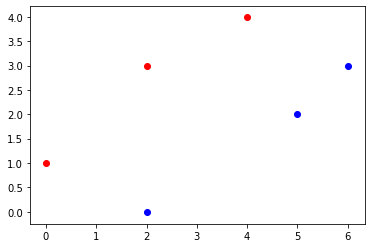

In [6]:
red_points = [(0,1),(2,3),(4,4)]
blue_points = [(2,0),(5,2),(6,3)]

plt.scatter([p[0] for p in red_points],[p[1] for p in red_points], color='red')
plt.scatter([p[0] for p in blue_points],[p[1] for p in blue_points], color='blue')

plt.show()

We know from class that if we have $p$ points and $p$ labels the decision boundary ,if distance metric is the euclidean, is the voronoi diagram of the points. In order to expand this in this case is the Voronoi diagram of the points but the neighboring cells with same color will be concatenated.

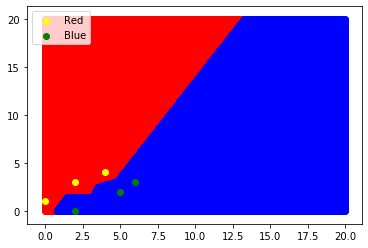

In [7]:
X = red_points + blue_points # list concatenate
y = 3*['red'] + 3*['blue']   # passing the labels

knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn.fit(X,y)

test_points = [(i,j) for i in np.arange(0,20,0.05) for j in np.arange(0,20,0.05)]
test_predictions = knn.predict(test_points)

test_points = [(p, c) for p,c in zip(test_points,test_predictions)]

plt.scatter([p[0][0] for p in test_points if p[1] == 'red'],[p[0][1] for p in test_points if p[1] == 'red'],
           color = 'red')

plt.scatter([p[0][0] for p in test_points if p[1] == 'blue'],[p[0][1] for p in test_points if p[1] == 'blue'],
           color = 'blue')

plt.scatter([p[0] for p in red_points], [p[1] for p in red_points], color='yellow',label='Red')
plt.scatter([p[0] for p in blue_points], [p[1] for p in blue_points], color='green',label='Blue')

plt.legend()
plt.show()

Therefore, as we observe in the above graph we made a right guess about the decision boundary, because each line is like splitting a pair of points in the middle and stops whenever intersects with another line. 

Now we will experiment with other distance metrics.

<h5>Manhattan Distance</h5>

The formula of Manhattan distance for two points $(x_1,y_1)$ and $(x_2,y_2)$ is $|x_2-x_1|+|y_2-y_1|$. 

The decision boundary is the following.

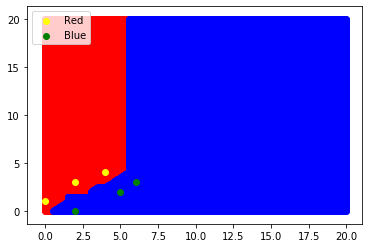

In [8]:
X = red_points + blue_points # list concatenate
y = 3*['red'] + 3*['blue']   # passing the labels

knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn.fit(X,y)

test_points = [(i,j) for i in np.arange(0,20,0.05) for j in np.arange(0,20,0.05)]
test_predictions = knn.predict(test_points)

test_points = [(p, c) for p,c in zip(test_points,test_predictions)]

plt.scatter([p[0][0] for p in test_points if p[1] == 'red'],[p[0][1] for p in test_points if p[1] == 'red'],
           color = 'red')

plt.scatter([p[0][0] for p in test_points if p[1] == 'blue'],[p[0][1] for p in test_points if p[1] == 'blue'],
           color = 'blue')

plt.scatter([p[0] for p in red_points], [p[1] for p in red_points], color='yellow',label='Red')
plt.scatter([p[0] for p in blue_points], [p[1] for p in blue_points], color='green',label='Blue')

plt.legend()

plt.show()

We can see that the decision boundary before the final line is almost the same as the one with Euclidean Distance.

<h5>Chebyshev Distance</h5>

The formula of Chebyshev distance for two points $(x_1,y_1)$ and $(x_2,y_2)$ is $max(|x_2-x_1|,|y_2-y_1|)$. 

The decision boundary is the following.

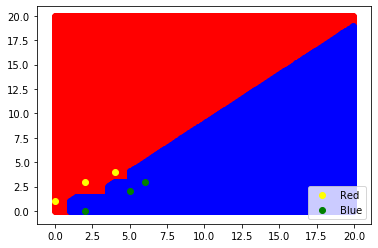

In [9]:
X = red_points + blue_points # list concatenate
y = 3*['red'] + 3*['blue']   # passing the labels

knn = KNeighborsClassifier(n_neighbors=1,metric='chebyshev')
knn.fit(X,y)

test_points = [(i,j) for i in np.arange(0,20,0.05) for j in np.arange(0,20,0.05)]
test_predictions = knn.predict(test_points)

test_points = [(p, c) for p,c in zip(test_points,test_predictions)]

plt.scatter([p[0][0] for p in test_points if p[1] == 'red'],[p[0][1] for p in test_points if p[1] == 'red'],
           color = 'red')

plt.scatter([p[0][0] for p in test_points if p[1] == 'blue'],[p[0][1] for p in test_points if p[1] == 'blue'],
           color = 'blue')

plt.scatter([p[0] for p in red_points], [p[1] for p in red_points], color='yellow',label='Red')
plt.scatter([p[0] for p in blue_points], [p[1] for p in blue_points], color='green',label='Blue')

plt.legend()

plt.show()

<i>2) If the y-coordinate of each point was multiplied by 5, what would happen to the k =
1 boundary? Draw a new picture. Explain whether this effect might cause problems in
practice.</i>

In order to determine how the decision boundary will be affected firstly we need to plot the points.

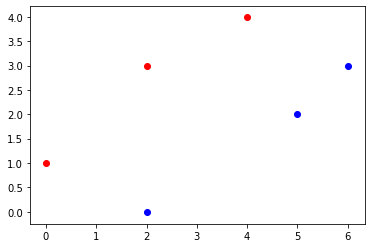

In [10]:
new_red_points = [(p[0],5*p[1]) for p in red_points]
new_blue_points = [(p[0],5*p[1]) for p in blue_points]

plt.scatter([p[0] for p in red_points],[p[1] for p in red_points], color='red')
plt.scatter([p[0] for p in blue_points],[p[1] for p in blue_points], color='blue')

plt.show()

Firstly, we will plot the new boundary.

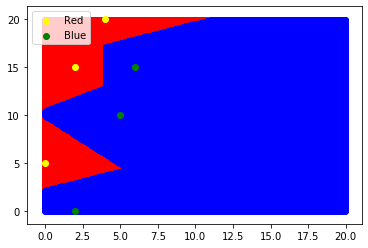

In [11]:
X = new_red_points + new_blue_points # list concatenate
y = 3*['red'] + 3*['blue']   # passing the labels

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X,y)

test_points = [(i,j) for i in np.arange(0,20,0.05) for j in np.arange(0,20,0.05)]
test_predictions = knn.predict(test_points)

test_points = [(p, c) for p,c in zip(test_points,test_predictions)]

plt.scatter([p[0][0] for p in test_points if p[1] == 'red'],[p[0][1] for p in test_points if p[1] == 'red'],
           color = 'red')

plt.scatter([p[0][0] for p in test_points if p[1] == 'blue'],[p[0][1] for p in test_points if p[1] == 'blue'],
           color = 'blue')

plt.scatter([p[0] for p in red_points], [p[1] for p in new_red_points], color='yellow',label='Red')
plt.scatter([p[0] for p in blue_points], [p[1] for p in new_blue_points], color='green',label='Blue')

plt.legend()

plt.show()

Comparing it with the boundary without multiplying the y-coordinates by 5 we observe that the <b>blue</b> region is bigger than before. 

If only the y-coordinate of the training points was multiplied by 5 then it is obvious that because the decision boundary is different, many testing points will be misclassified, therefore our model will not be very accurate. If even the y-coordinate of the testing points will get multiplied by 5 we will still have more points misclassified because we can see from the previous boundary that along x axis there were points in the red region with $y=0$, but now all the points with $y=0$ and $x \geq 0$ will be classified as blue because $5*0 = 0$, therefore these testing points will not moved to the red region, thus they will be misclassified.

<i>3)Can you draw the decision boundary for k=3?</i>

For this question we thought the following:

<ol>
    <li>Firstly, we thought to draw the Voronoi diagram of the training points and for each point we check what is its 2 nearest neighbors(because the current point is one neighbor) and the majority of the neighboring points will draw the cell in that colow, but this way did not work  because the last red point will not miscassfied and even of it does it will take its whole voronoi cell but that's not the case because this point is on the boundary.</li>
    <li>Secondly, we thought to draw the largest empty circle of each training point and we draw each circle to the color of its center point and in the parts that were overlapping two or more cirles, for this part we would cast a vote on how to draw it. Unfortunately, this was very complicated and, furthermore when we tried to draw it there wasn't drawn the boundary at $x\in[2,4]$ like that. Furthermore, we wouldn't knew how to resolve ties.</li>
    <li>Lastly, we thought to do the same as the second suggestion but the centers would be the vertices of the voronoi cells, but we encountered the same problems as before.</li>
</ol>

Thus, we run this code to produce the decision boundary of 3-NN.

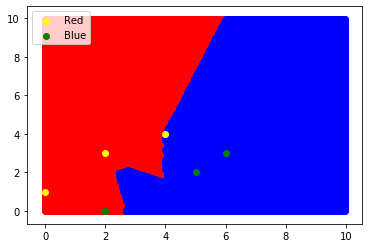

In [12]:
red_points = [(0,1),(2,3),(4,4)]
blue_points = [(2,0),(5,2),(6,3)]

X = red_points + blue_points # list concatenate
y = 3*['red'] + 3*['blue']   # passing the labels

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X,y)

test_points = [(i,j) for i in np.arange(0,10,0.05) for j in np.arange(0,10,0.05)]
test_predictions = knn.predict(test_points)

test_points = [(p, c) for p,c in zip(test_points,test_predictions)]

plt.scatter([p[0][0] for p in test_points if p[1] == 'red'],[p[0][1] for p in test_points if p[1] == 'red'],
           color = 'red')

plt.scatter([p[0][0] for p in test_points if p[1] == 'blue'],[p[0][1] for p in test_points if p[1] == 'blue'],
           color = 'blue')

plt.scatter([p[0] for p in red_points], [p[1] for p in red_points], color='yellow',label='Red')
plt.scatter([p[0] for p in blue_points], [p[1] for p in blue_points], color='green',label='Blue')

plt.legend()

plt.show()

There we can see that the drawing is more complex, therefore we could not know what the boundary would be, so we run the script. But, comparing it with the decision boundary of $k=1$ we can clearly see that we have error in the training step(specifically 2 errors).

<i>4) Suppose now we have a test point at (1, 2). How would it be classied under 3-NN? Given
that you can modify the 3-NN decision boundary by adding points to the training set in
the diagram, what is the minimum number of points that you need to add to change the
classication at (1, 2)? Provide also the coordinates for these new points and justify your
answer.</i>

Firstly, note that we assume that the distance metric is the <b>Euclidean Distance</b>.

If we do the calculations we can see that the 3 nearest neighbors of $(1,2)$ are the following:

<ol>
    <li>$(0,1)$ with distance 1 and its <b>Red</b></li>
    <li>$(2,3)$ with distance $\sqrt{2}$ and its <b>Red</b></li>
    <li>$(2,0)$ with distance $\sqrt{5}$ and its <b>Blue</b></li>
</ol>

So, it is obvious that the given point is <b>Red</b> and in order to revert the decision we should add at least 2 points in the training set, because if we add one in each case we will have 2 <b>Red</b> points. The two <b>Blue</b> points that we can add to the training set in order to point $(1,2)$ can be classified as <b>Blue</b> ,are the $(\frac{1}{2},2)$ and $(\frac{3}{2},2)$ which both have distance $\frac{1}{2}$ from $(1,2)$ and they are <b>Blue</b>. So, the new 3 nearest neighbors are the following:

<ol>
    <li>$(\frac{1}{2},2)$ with distance $\frac{1}{2}$ and its <b>Blue</b></li>
    <li>$(\frac{3}{2},2)$ with distance $\frac{1}{2}$ and its <b>Blue</b></li>
    <li>$(0,1)$ with distance 1 and its <b>Red</b></li>
</ol>

Therefore, the new point is classified as <b>Blue</b>.


<h3>Exercise 4</h3>

<i>How  long  does  it  take  for  $k$-NN  to  classify  one  point?   Or  in  other  words what is the testing complexity for one instance?  Assume your data has dimensionality $d$, you have $n$ training examples and use Euclidean distance.  Assume also that you use a quick select implementation which gives you the $k$ smallest elements of a list of length $m$ in $O(m)$.</i>

The steps that we will take to classify one point are the following:

<ol>
    <li> Compute the distance of the given point with the points in the training set.</li>
    <li> Run the quick-select algorithm in order to get the k-nearest neighbors of the given point.</li>
    <li> Count the frequency of each label and select the most frequent one.</li>
</ol>

The number of computations at each step are the following:

<ul>
    <li> The first step takes $nd$ time because there are needed $d$ computations to find the Euclidean Distance and we have $n$ training samples.</li>
    <li> The second step takes $O(n)$ time because the complexity of the algorithm is given and we have $n$ training samples.</li>
    <li> The third step if he had a naive approach to first get the frequency of each label and after find the most frequent label takes $k+l$ where $l$ is the number of labels</li>
</ul>

Therefore, the total time complexity to classify 1 point via the $k$-NN classifier is $nd+O(n)+k+l=O(nd)$. 

# <h3>Exercise 5</h3>

<i>To see an application of the $k$-NN algorithm in a real world classification problem consider the data found at <a href=https://www.kaggle.com/uciml/iris>https://www.kaggle.com/uciml/iris </a>.  Download from there the Iris.csv file.  Ignore the id column and consider the columns:  SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm as point coordinates in a four dimensional space.  Consider the column Species as the class/label column.  The file contains 150 rows.  Run the algorithm onthe first 100 rows and make predictions for the rest 50.  How your predictions are compared to the actual?  Explain your methodology.

First of we save the training dataset(Iris.csv). 
We save the columns 'SepalLengrhCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'.
The last one is the classification label.

We use the train_test_split in order to split our data to training and testing Data.
For the testing Data we drop the Species column because the point of the algorithm is to predict the label from the training data.
For both the training and the testing data we to_numpy in order to have our data in usable form.

Note that we used the <b>randomized</b> splitting function train_test_split because in the dataset there are 3 labels, but the rows are grouped by label, therefore if we train our model with the first 100 rows then the training dataset will not have samples of the third label and all the samples of the testing dataset will have the third label.

Now that we have the data ready we run the algorithm for every testing data case.
The k-NN algorithm will take this testing data case and will compute it's distance with all the other training data points. This will be done with a metric, the euclidean distance. The first k distances with their rows(point's data) will be saved in the kNearest list. For every next row/point we again measure the distance and we check if it has less distance than at least one point/row in the kNearest list. If it does we insert the new point in the kNearest list, we sort the list by distance and then we keep the k points with the least current distance. This process will continue for all training data points.

In this end of this process we have the k closer training points to our test data point based on these fields 'SepalLengrhCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' and their euclidean distance. 


When we need classification, we find the k most similar points from the kNearest list.  
From these k points we find the group name/label which is most commonly found. This group name will be the classified label.

In [13]:
from sklearn.model_selection import train_test_split

dataFileName="Iris.csv"
irisData=pd.read_csv(dataFileName) ## read_csv return a dataframe
irisData.head()

myData=irisData[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']] ## pass in indexing operatior [] a list of columns ['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

trainSplit, testSplit = train_test_split(myData, test_size=0.3, shuffle='true')

trainingDatanp=trainSplit.to_numpy() #take the first 100 rows for training data

testingData=testSplit.drop(columns='Species') #take the last 50 rows without the classification column
testingDatanp=testingData.to_numpy()

k=30
kNearest = []
actual = list(testSplit['Species'])
predicted = []

#Classifying the test set samples
for test in testingDatanp:
    kNearest=findKNearest(test,trainingDatanp,k)
    neighList=[]
    for neighbor in kNearest:
        neighList+=[neighbor[4]]
    mfi = mostFrequentItem(neighList)
    predicted += [mfi]
    print(test)
    print(mfi)
    print()

[7.2 3.  5.8 1.6]
Iris-virginica

[6.7 3.  5.  1.7]
Iris-virginica

[5.8 2.7 5.1 1.9]
Iris-virginica

[5.4 3.4 1.5 0.4]
Iris-setosa

[4.6 3.2 1.4 0.2]
Iris-setosa

[6.  2.2 4.  1. ]
Iris-versicolor

[6.1 2.8 4.  1.3]
Iris-versicolor

[6.2 3.4 5.4 2.3]
Iris-virginica

[6.4 2.8 5.6 2.1]
Iris-virginica

[5.6 2.7 4.2 1.3]
Iris-versicolor

[5.4 3.9 1.7 0.4]
Iris-setosa

[5.1 2.5 3.  1.1]
Iris-versicolor

[6.3 2.3 4.4 1.3]
Iris-versicolor

[6.5 3.  5.8 2.2]
Iris-virginica

[6.6 3.  4.4 1.4]
Iris-versicolor

[5.6 2.9 3.6 1.3]
Iris-versicolor

[6.5 3.2 5.1 2. ]
Iris-virginica

[5.  2.3 3.3 1. ]
Iris-versicolor

[5.9 3.  4.2 1.5]
Iris-versicolor

[6.2 2.9 4.3 1.3]
Iris-versicolor

[5.5 4.2 1.4 0.2]
Iris-setosa

[4.6 3.4 1.4 0.3]
Iris-setosa

[5.1 3.5 1.4 0.3]
Iris-setosa

[5.  3.5 1.3 0.3]
Iris-setosa

[5.1 3.7 1.5 0.4]
Iris-setosa

[6.4 3.1 5.5 1.8]
Iris-virginica

[5.7 2.6 3.5 1. ]
Iris-versicolor

[5.7 3.8 1.7 0.3]
Iris-setosa

[5.5 2.6 4.4 1.2]
Iris-versicolor

[6.7 3.1 4.7 1.5]
Iris-versic


Performance Evaluation of our model

As we can see our algorithm works pretty well and has perfect accuracy.
With huge data though this algorithm could easily become slow and if it has noisy data it could create wrong results.
With few data we may also not have correct results especially if k has a large value. This will happen because the most common label will be from neighbors who are far away from our test point.

In [14]:

# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(actual, predicted) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

for i in range(len(actual)):
    print(actual[i], predicted[i])

Confusion Matrix :
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
Accuracy Score : 0.9777777777777777
Report : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Iris-virginica Iris-virginica
Iris-versicolor Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris